In [ ]:
!mkdir Airsim
!cp ./drive/Shareddrives/Sam/Datasets/AirSim.zip ./sample_data/

mkdir: cannot create directory ‘Airsim’: File exists


In [ ]:
!unzip ./sample_data/AirSim.zip -d ./Airsim/

Archive:  ./sample_data/AirSim.zip
replace ./Airsim/2022-03-03-17-59-44/airsim_rec.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


DATA_PATH = './Airsim'

In [ ]:
folders = os.listdir(DATA_PATH)
folders.sort()

In [ ]:
def plot(sets):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for i, s in enumerate(sets):
        ax.scatter(s[:,0], s[:,1])
    ax.set_xlim(0, 140)
    ax.set_ylim(70, -70)
    plt.show()

In [ ]:
path = os.path.join(DATA_PATH, folders[0], 'airsim_rec.txt')
samples1 = pd.read_csv(path, sep='\t')
X1 = samples1["POS_X"].to_numpy()
Y1 = samples1["POS_Y"].to_numpy()
Z1 = samples1["POS_Z"].to_numpy()

samples1.head()

,VehicleName,TimeStamp,POS_X,POS_Y,POS_Z,Q_W,Q_X,Q_Y,Q_Z,Throttle,Steering,Brake,Gear,Handbrake,RPM,Speed,ImageFile
0,PhysXCar,1646315567453,-0.000002,-0.000024,-0.582521,1.000000,0.000031,-8.214780e-12,-2.663160e-07,0.5780,1.25000,0.0,0,0,2024.01,7.282090e-08,img_PhysXCar__0_1646315567435787000.png
1,PhysXCar,1646315567998,-0.000002,-0.000024,-0.582231,1.000000,0.000031,-8.214780e-12,-2.663160e-07,0.5705,1.25000,0.0,1,0,1808.79,7.998550e-04,img_PhysXCar__0_1646315567997581400.png
2,PhysXCar,1646315568497,0.003413,0.002718,-0.582149,0.999999,-0.000166,1.881520e-04,1.197690e-03,0.5705,1.25000,0.0,1,0,1716.20,2.219290e-01,img_PhysXCar__0_1646315568478660900.png
3,PhysXCar,1646315568961,0.036250,0.020646,-0.582194,0.999960,-0.000879,8.431870e-04,8.899460e-03,1.0000,0.16000,0.0,1,0,1695.16,5.412350e-01,img_PhysXCar__0_1646315568960573300.png
4,PhysXCar,1646315569478,0.103286,0.042598,-0.582241,0.999843,-0.000979,1.313370e-03,1.763320e-02,1.0000,-0.24375,0.0,1,0,1953.83,9.172910e-01,img_PhysXCar__0_1646315569476890000.png


In [ ]:
X1 = samples1["POS_X"].to_numpy()
Y1 = samples1["POS_Y"].to_numpy()
Z1 = samples1["POS_Z"].to_numpy()

In [ ]:
path = os.path.join(DATA_PATH, folders[17], 'airsim_rec.txt')
samples2 = pd.read_csv(path, sep='\t')
X2 = samples2["POS_X"].to_numpy()
Y2 = samples2["POS_Y"].to_numpy()
Z2 = samples2["POS_Z"].to_numpy()

In [ ]:
path = os.path.join(DATA_PATH, folders[30], 'airsim_rec.txt')
samples3 = pd.read_csv(path, sep='\t')
X3 = samples3["POS_X"].to_numpy()
Y3 = samples3["POS_Y"].to_numpy()
Z3 = samples3["POS_Z"].to_numpy()

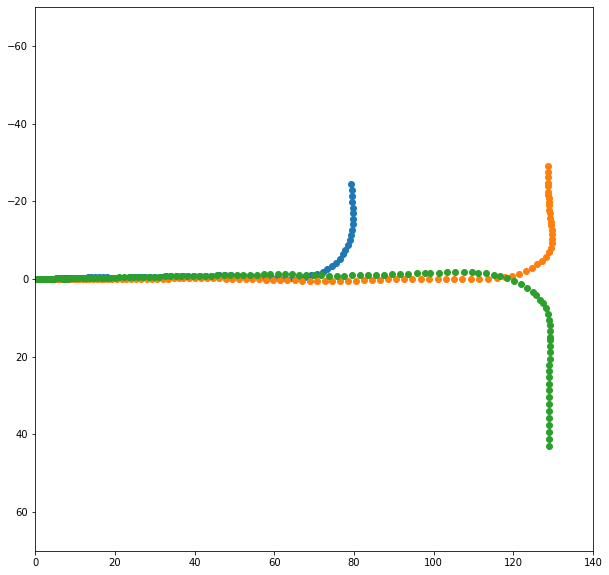

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(X1, Y1)
ax.scatter(X2, Y2)
ax.scatter(X3, Y3)
ax.set_xlim(0, 140)
ax.set_ylim(70, -70)
plt.show()

In [ ]:
path = os.path.join(DATA_PATH, folders[32], 'airsim_rec.txt')
samples = pd.read_csv(path, sep='\t')

x_s = np.expand_dims(samples["POS_X"].to_numpy(), axis=-1)
y_s = np.expand_dims(samples["POS_Y"].to_numpy(), axis=-1)

q_w = samples["Q_W"].to_numpy()
q_x = samples["Q_X"].to_numpy()
q_y = samples["Q_Y"].to_numpy()
q_z = samples["Q_Z"].to_numpy()

sample_set = np.hstack((x_s,y_s))

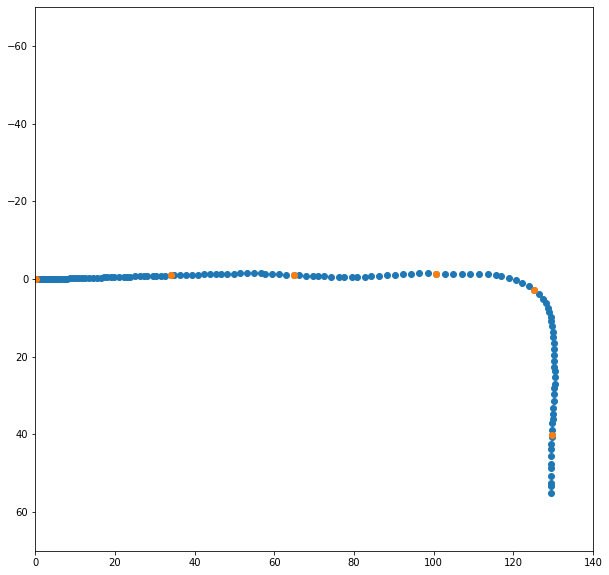

In [ ]:
idx = [10, 60, 80, 100, 113, 140]

plot([sample_set, sample_set[idx]])

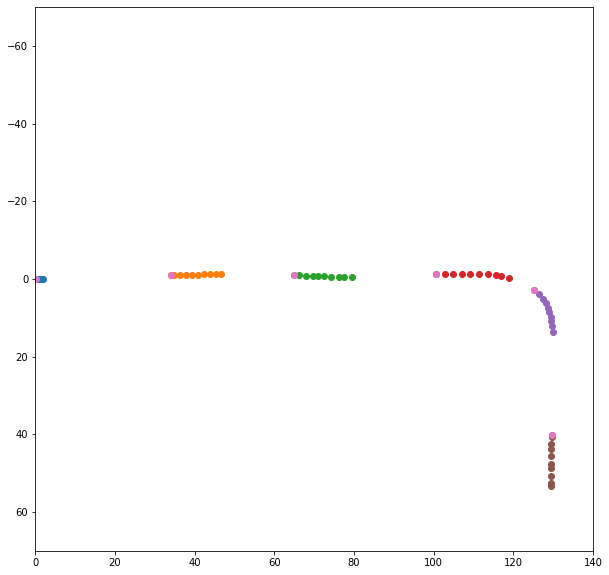

In [ ]:
array = []
for id in idx:
    array.append(sample_set[id:id+10])
array.append(sample_set[idx])
plot(array)

In [ ]:
#####
def quaternion_to_euler(q_x, q_y, q_z, q_w):
        t0 = +2.0 * (q_w * q_x + q_y * q_z)
        t1 = +1.0 - 2.0 * (q_x * q_x + q_y * q_y)
        roll_x = np.arctan2(t0, t1)
     
        t2 = +2.0 * (q_w * q_y - q_z * q_x)
        np.clip(t2, -1.0, +1.0)
        pitch_y = np.arcsin(t2)
     
        t3 = +2.0 * (q_w * q_z + q_x * q_y)
        t4 = +1.0 - 2.0 * (q_y * q_y + q_z * q_z)
        yaw_z = np.arctan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians


In [ ]:
a, b, c = quaternion_to_euler(q_x, q_y, q_z, q_w)
print("Z angles:")
for i in idx:
    print(c[i]/np.pi * 180)

Z angles:
0.0007693137636163033
-1.7460625247470634
3.4048740121688503
2.80314721959264
58.36263759215743
92.39328334627741


In [ ]:
#####
def normalize_points(set_of_points, z_rotate, len=20.0):
    s = set_of_points - set_of_points[0]
    R = np.array([[np.cos(z_rotate), -np.sin(z_rotate)],
                  [np.sin(z_rotate), np.cos(z_rotate)]])
    s = s @ R
    s /= len
    return s

In [ ]:
def draw_normal_points(ax, s, c):
    d = normalize_points(s, c)
    ax.set_title("Control Points")
    ax.scatter(d[:,0], d[:,1], s=10, color='r')
    ax.set_xlim(0, 1)
    ax.set_ylim(0.5, -0.5)

In [ ]:
def draw_on_map(ax, s):
    ax.set_title("Map")
    ax.scatter(s[:,0], s[:,1], s=5)
    ax.set_xlim(0, 140)
    ax.set_ylim(70, -70)

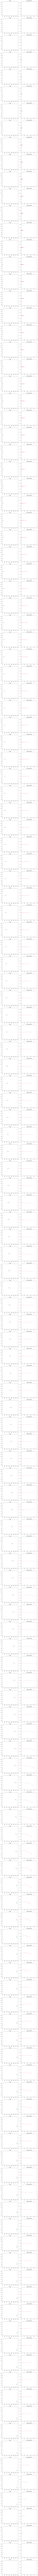

In [ ]:
fig, axes = plt.subplots(sample_set.shape[0], 2, figsize=(10, sample_set.shape[0] * 5))

for i, (ax1, ax2) in enumerate(axes):
    draw_on_map(ax1, sample_set[i:i+10])
    draw_normal_points(ax2, sample_set[i:i+10], c[i])
